<a href="https://colab.research.google.com/github/kavya6301/Polymerize-assessment/blob/main/Kavya's_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
poly_data = pd.read_csv('https://polymerize-misc.s3.ap-southeast-1.amazonaws.com/hiring_challenge/ml_challenge.csv')
poly_data.head()

,ID,C1,V1,B1,B2,B3,B4,Target
0,1,5,555,1,1,0,1,5263
1,2,5,625,1,1,0,1,6064
2,3,5,821,1,1,0,1,8314
3,4,5,1498,1,1,0,1,13995
4,5,5,559,1,1,0,1,4822


In [4]:
poly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      999999 non-null  int64 
 1   C1      999999 non-null  int64 
 2   V1      999999 non-null  int64 
 3   B1      999999 non-null  int64 
 4   B2      999999 non-null  int64 
 5   B3      999999 non-null  object
 6   B4      999999 non-null  int64 
 7   Target  999999 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 61.0+ MB


### Key Observations
- There are no NULL Values in the given dataset
- [C1, V1, B1, B2, B4] are stored as `int64` remaining columns are `object` type variables ( exception of ID)

In [5]:
poly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,999999.0,558.284705,321.898246,1.0,280.0,558.0,837.0,1115.0
C1,999999.0,4.001026,1.997711,1.0,2.0,4.0,6.0,7.0
V1,999999.0,633.988009,464.728891,0.0,405.0,610.0,838.0,7388.0
B1,999999.0,0.830579,0.375124,0.0,1.0,1.0,1.0,1.0
B2,999999.0,0.382505,0.485999,0.0,0.0,0.0,1.0,1.0
B4,999999.0,0.176628,0.381354,0.0,0.0,0.0,0.0,1.0
Target,999999.0,5784.055618,3852.151776,0.0,3739.0,5753.0,7866.0,41551.0


- `Target` mean is around 5784 and max is 41551, i.e, it can either be right skewed normally distributed or gamma distributed
- `B1 B2 B4` are of discrete values (0 or 1) and C1 whereas V1 have continuous values ranging from [0,7388]


In [5]:
b1_counts = poly_data['B1'].value_counts()
b1_counts

1    830578
0    169421
Name: B1, dtype: int64

In [6]:
b2_counts = poly_data['B2'].value_counts()
b2_counts

0    617494
1    382505
Name: B2, dtype: int64

In [7]:
b3_counts = poly_data['B3'].value_counts()
b3_counts

0    822341
0    148031
a     18837
b      6690
c      4100
Name: B3, dtype: int64

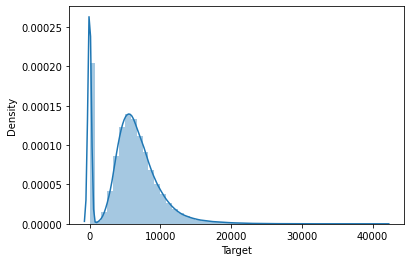

In [8]:
sns.distplot(poly_data['Target'])

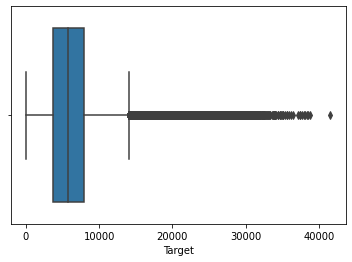

In [9]:
sns.boxplot(x ='Target', data = poly_data)

- The **Target** variable is approximately normally distributed over the data set with some outliers ranging upto 40000
- As this is a continuous output (i.e, regression), presence of outliers will affect the accuracy and predictions 
### Data Cleaning 
- Making a new dataframe such that the target values are normal distributed with minimal right skew.



In [6]:
poly_data = poly_data.loc[poly_data['Target']<=12000]
poly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947256 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ID      947256 non-null  int64 
 1   C1      947256 non-null  int64 
 2   V1      947256 non-null  int64 
 3   B1      947256 non-null  int64 
 4   B2      947256 non-null  int64 
 5   B3      947256 non-null  object
 6   B4      947256 non-null  int64 
 7   Target  947256 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 65.0+ MB


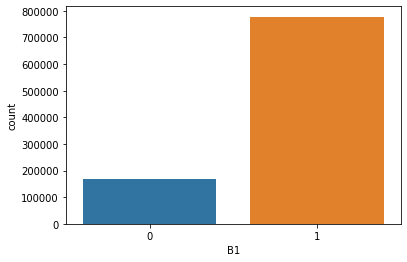

In [7]:
sns.countplot(x='B1',data = poly_data)

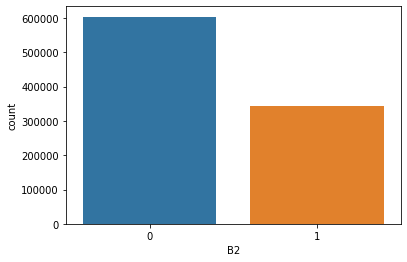

In [12]:
sns.countplot(x='B2',data = poly_data)

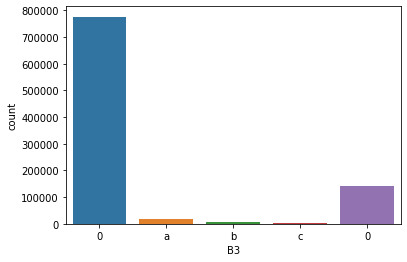

In [13]:
sns.countplot(x='B3',data = poly_data)

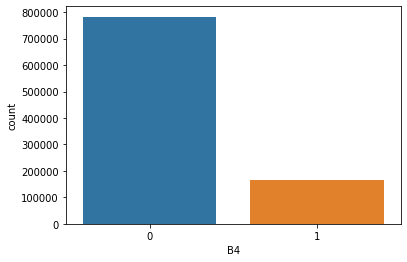

In [14]:
sns.countplot(x='B4',data = poly_data)

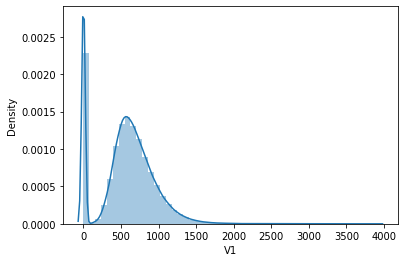

In [15]:
sns.distplot(poly_data['V1'])

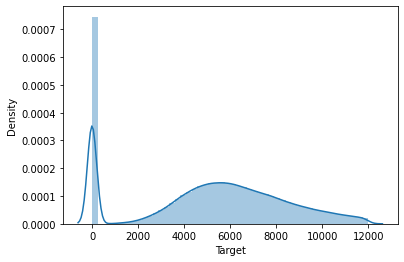

In [ ]:
# Target variable - clean - removing outliers 
sns.distplot(poly_data['Target'])

- Distribution Plot of Target gives that there are two normally distributions with $μ_1$ ~ 0 and $μ_2$ ~ 5000
- Hence, we can make two pipelines accordingly to the input values and predict them using various Regression Algorithms such as Linear, Ridge, Decision Tree Regressor, Random Forest Regressor, etc.
- `Target` and `V1` are highly correlated as they have similar distribution plots

- `poly_data_low` corresponds to the `Target` values `<1100`
- `poly_data` corresponds to the `Target` values `>1100`

In [8]:
poly_data['B3']

0         0
1         0
2         0
4         0
5         0
         ..
999994    0
999995    0
999996    0
999997    0
999998    0
Name: B3, Length: 947256, dtype: object

In [9]:
# Working on single categorical variable i.e. B3
b3_modifier = {'0': 1, 'a':2,'b':3,'c':4}
poly_data['B3'] = poly_data['B3'].replace(b3_modifier)
poly_data['B3'].value_counts()

1    775881
0    141947
2     18703
3      6645
4      4080
Name: B3, dtype: int64

In [18]:
poly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947256 entries, 0 to 999998
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   ID      947256 non-null  int64
 1   C1      947256 non-null  int64
 2   V1      947256 non-null  int64
 3   B1      947256 non-null  int64
 4   B2      947256 non-null  int64
 5   B3      947256 non-null  int64
 6   B4      947256 non-null  int64
 7   Target  947256 non-null  int64
dtypes: int64(8)
memory usage: 105.0 MB


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [17]:
train, test = train_test_split(poly_data, test_size=0.30, random_state = 5)
print(train.shape,test.shape,end='\n')

(663079, 8) (284177, 8)


In [18]:
train

,ID,C1,V1,B1,B2,B3,B4,Target
517718,29,1,564,1,0,1,0,5736
17497,773,4,812,1,1,1,0,5318
464842,673,7,0,0,0,1,0,0
424332,303,1,785,1,1,1,0,7759
716953,794,5,512,1,1,1,0,2864
...,...,...,...,...,...,...,...,...
801082,183,6,393,1,0,1,0,2755
131735,166,6,1174,1,0,1,0,9137
576589,920,5,569,1,0,0,0,5323
19657,703,2,376,1,1,1,1,4137


In [19]:
train_label=train['Target']
test_label=test['Target']

In [20]:
del train['Target']
del test['Target']

**Linear Regression**

In [21]:
lr=LinearRegression()
lr.fit(train,train_label)

LinearRegression()

In [22]:
predict_lr=lr.predict(test)
mse=mean_squared_error(test_label,predict_lr)
lr_score=np.sqrt(mse)
lr_score

1218.4309159744698

In [24]:
#Cross validation for linear regression
score=cross_val_score(lr,train,train_label,cv=10,scoring='neg_mean_squared_error')
lr_score_cross=np.sqrt(-score)
np.mean(lr_score_cross),np.std(lr_score_cross)

(1218.7974387015297, 5.627953283248505)

**Ridge regression**

In [25]:
r=Ridge(alpha=0.05,solver='cholesky')
r.fit(train,train_label)
predict_r=r.predict(test)
mse=mean_squared_error(test_label,predict_r)
r_score=np.sqrt(mse)
r_score

1218.430917183721

In [26]:
#Cross validation for Ridge
r=Ridge(alpha=0.05,solver='cholesky')
score=cross_val_score(r,train,train_label,cv=10,scoring='neg_mean_squared_error')
r_score_cross=np.sqrt(-score)
np.mean(r_score_cross),np.std(r_score_cross)

(1218.7974386810524, 5.627957275663986)

**Decision Tree Regression**

In [27]:
dtr=DecisionTreeRegressor()
dtr.fit(train,train_label)
predict_r=dtr.predict(test)
mse=mean_squared_error(test_label,predict_r)
dtr_score=np.sqrt(mse)
dtr_score

653.7155132706562

In [28]:
#Cross val decision tree regression
dtr=DecisionTreeRegressor()
score=cross_val_score(dtr,train,train_label,cv=10,scoring='neg_mean_squared_error')
dtr_score_cross=np.sqrt(-score)
np.mean(dtr_score_cross),np.std(dtr_score_cross)

(673.5656207845257, 6.332101181714918)

**Random Forest**

In [29]:
rf=RandomForestRegressor()
rf.fit(train,train_label)
predict_r=rf.predict(test)
mse=mean_squared_error(test_label,predict_r)
rf_score=np.sqrt(mse)
rf_score

518.0609958799434

**Scores**

In [39]:
name=['Linear Regression','Linear Regression CV','Ridge Regression','Ridge Regression CV','Decision Tree','Decision Tree Regression','Random Forest']

In [40]:
go=pd.DataFrame({'RMSE':[lr_score,lr_score_cross,r_score,r_score_cross,dtr_score,dtr_score_cross,rf_score]},index=name)

In [41]:
go['RMSE']=go.applymap(lambda x: x.mean())
go.RMSE.sort_values()

Random Forest                518.060996
Decision Tree                653.715513
Decision Tree Regression     673.565621
Linear Regression           1218.430916
Ridge Regression            1218.430917
Ridge Regression CV         1218.797439
Linear Regression CV        1218.797439
Name: RMSE, dtype: float64

It seems like **Random Forest** is performing good, as it has less rmse score compared to other algorithms here. So we can use Random forest as our model for prediction